In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Load CSV file into memory

In [2]:
data = pd.read_csv('uber-raw-data-apr14.csv')

In [3]:
data

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


# Convert datatime and add some useful (?) columns

In [5]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [6]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  564516 non-null  datetime64[ns]
 1   Lat        564516 non-null  float64       
 2   Lon        564516 non-null  float64       
 3   Base       564516 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.2+ MB


In [8]:
def get_dom(dt):
    return dt.day

In [9]:
data['dom'] = data['Date/Time'].map(get_dom)

In [10]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [11]:
def get_weekday(dt):
    return dt.weekday()

In [12]:
data['weekday'] = data['Date/Time'].map(get_weekday)

In [13]:
def get_hour(dt):
    return dt.hour

In [14]:
data['hour'] = data['Date/Time'].map(get_hour)

In [15]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# analysis

## analyze the DoM

Text(0.5, 1.0, 'Frequency by DoM - uber - Apr 2014')

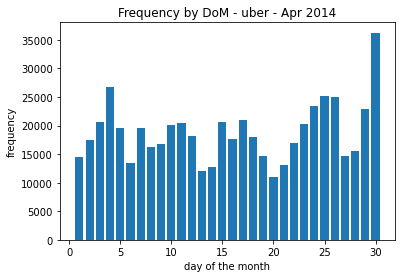

In [16]:
hist(data.dom, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('day of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Apr 2014')

In [17]:
for k, rows in data.groupby('dom'):
    print((k, len(rows)))

(1, 14546)
(2, 17474)
(3, 20701)
(4, 26714)
(5, 19521)
(6, 13445)
(7, 19550)
(8, 16188)
(9, 16843)
(10, 20041)
(11, 20420)
(12, 18170)
(13, 12112)
(14, 12674)
(15, 20641)
(16, 17717)
(17, 20973)
(18, 18074)
(19, 14602)
(20, 11017)
(21, 13162)
(22, 16975)
(23, 20346)
(24, 23352)
(25, 25095)
(26, 24925)
(27, 14677)
(28, 15475)
(29, 22835)
(30, 36251)


In [18]:
for k, rows in data.groupby('dom'):
    print((k, rows))
    break    

(1,                  Date/Time      Lat      Lon    Base  dom  weekday  hour
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512    1        1     0
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512    1        1     0
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512    1        1     0
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512    1        1     0
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512    1        1     0
...                    ...      ...      ...     ...  ...      ...   ...
554926 2014-04-01 23:21:00  40.7219 -73.9920  B02764    1        1    23
554927 2014-04-01 23:25:00  40.7261 -74.0027  B02764    1        1    23
554928 2014-04-01 23:38:00  40.7364 -73.9926  B02764    1        1    23
554929 2014-04-01 23:41:00  40.7149 -73.9405  B02764    1        1    23
554930 2014-04-01 23:46:00  40.7493 -73.9768  B02764    1        1    23

[14546 rows x 7 columns])


In [19]:
by_date = data.groupby('dom').apply(lambda rows: len(rows))
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

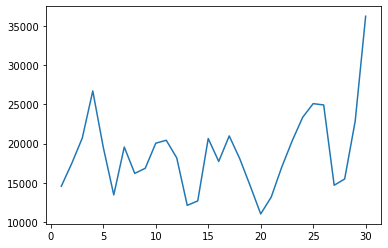

In [20]:
plot(by_date)

<BarContainer object of 30 artists>

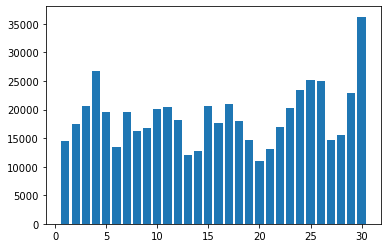

In [21]:
bar(range(1, 31), by_date)

In [22]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

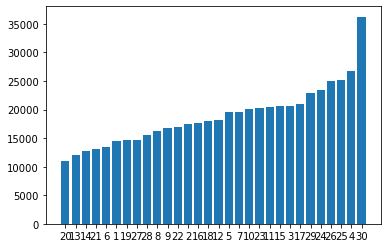

In [23]:
bar(range(1, 31), by_date_sorted)
xticks(range(1, 31), by_date_sorted.index)
;

## analyze the hour

(array([ 24614.,  11135.,  27974.,  65706.,  36639.,  42028., 104517.,
         88478.,  75167.,  88258.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

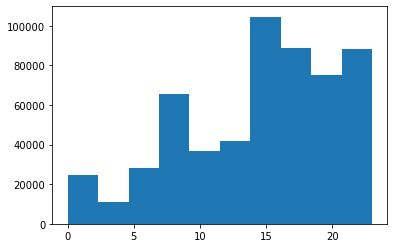

In [24]:
hist(data.hour)

(array([11910.,  7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924.,
        22843., 17939., 17865., 18774., 19425., 22603., 27190., 35324.,
        42003., 45475., 43003., 38923., 36244., 36964., 30645., 20649.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5,
        21.5, 22.5, 23.5]),
 <BarContainer object of 24 artists>)

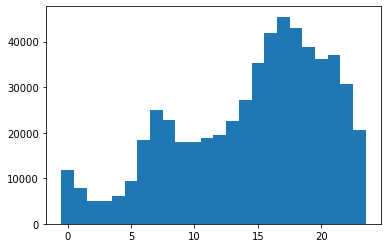

In [25]:
hist(data.hour, bins=24, range=(-0.5, 23.5))

## analyze the weekday

(array([ 60861.,  91185., 108631.,  85067.,  90303.,  77218.,  51251.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <BarContainer object of 7 artists>)

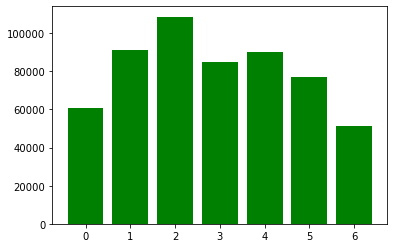

In [26]:
hist(data.weekday, bins=7, range=(-.5, 6.5), rwidth=.8, color='green')

## cross-analysis (hour, dow)

In [27]:
by_h_d = data.groupby('hour weekday'.split()).apply(lambda rows: len(rows))
by_h_d

hour  weekday
0     0           518
      1           765
      2           899
      3           792
      4          1367
                 ... 
23    2          2571
      3          2909
      4          5393
      5          5719
      6          1018
Length: 168, dtype: int64

In [28]:
by_h_d = data.groupby('hour weekday'.split()).apply(lambda rows: len(rows)).unstack()
by_h_d

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


In [29]:
by_cross = data.groupby('weekday hour'.split()).apply(lambda rows: len(rows)).unstack()
by_cross

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


<AxesSubplot:xlabel='hour', ylabel='weekday'>

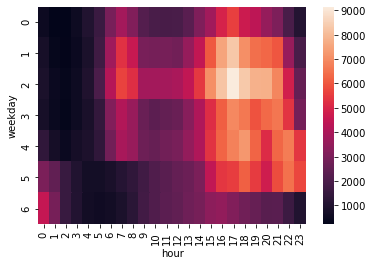

In [30]:
sns.heatmap(by_cross)

## by lat and lon

''

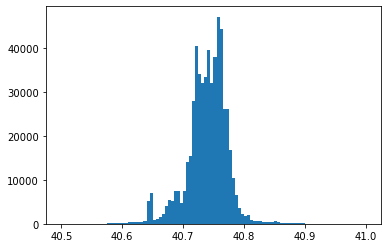

In [31]:
hist(data['Lat'], 100, range=(40.5, 41))
;

''

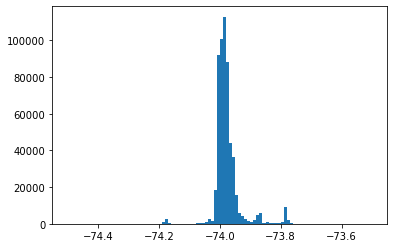

In [32]:
hist(data['Lon'], 100, range=(-74.5, -73.5))
;

''

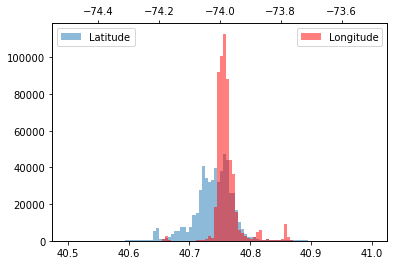

In [33]:
hist(data['Lat'], 100, range=(40.5, 41), alpha=0.5, label='Latitude')
legend(loc='upper left')
twiny()
hist(data['Lon'], 100, range=(-74.5, -73.5), color='red', alpha=0.5, label='Longitude')
legend(loc='best')
;

(40.7, 40.85)

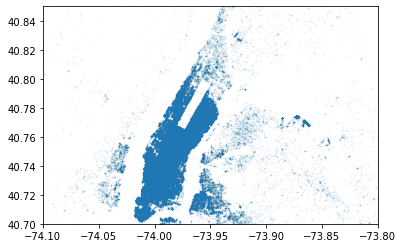

In [39]:
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=0.05)
xlim(-74.1, -73.8)
ylim(40.7, 40.85)